In [1]:
import pandas as pd
!pip install plotly_express
import plotly_express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 2.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 713.4 kB/s eta 0:00:0000:0100:01


In [2]:
#set notebook mode
init_notebook_mode(connected=True)

In [49]:
#read data using panda frame
import os
print(os.getcwd())
#df = pd.read_csv("TP-Regression/possum.csv")
df = pd.read_csv("./possum.csv")
df = df.drop('case', axis=1)
df.head()

/home/yasser/code/TP02


,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [50]:
# count the number of valid features
df.count()

site        104
Pop         104
sex         104
age         102
hdlngth     104
skullw      104
totlngth    104
taill       104
footlgth    103
earconch    104
eye         104
chest       104
belly       104
dtype: int64

In [51]:
# show some information about the data frame
df.describe()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [52]:
# fill in the missing data
df["age"] = df["age"].fillna(df["age"].mean())
df["footlgth"] = df["footlgth"].fillna(df["footlgth"].mean())

In [53]:
# extract information about the input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      104 non-null    int64  
 1   Pop       104 non-null    object 
 2   sex       104 non-null    object 
 3   age       104 non-null    float64
 4   hdlngth   104 non-null    float64
 5   skullw    104 non-null    float64
 6   totlngth  104 non-null    float64
 7   taill     104 non-null    float64
 8   footlgth  104 non-null    float64
 9   earconch  104 non-null    float64
 10  eye       104 non-null    float64
 11  chest     104 non-null    float64
 12  belly     104 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 10.7+ KB


In [54]:
# extract the number of sample points
n_rows = df.shape[0]

In [55]:
# extract some X data to predict ouput
# chest and belly also works out
X=df['skullw'].to_numpy().reshape(n_rows)
#extract some Y data
y=df['hdlngth'].to_numpy().reshape(n_rows)

In [56]:
# ensure that he dimensions are OK
X.shape, y.shape

((104,), (104,))

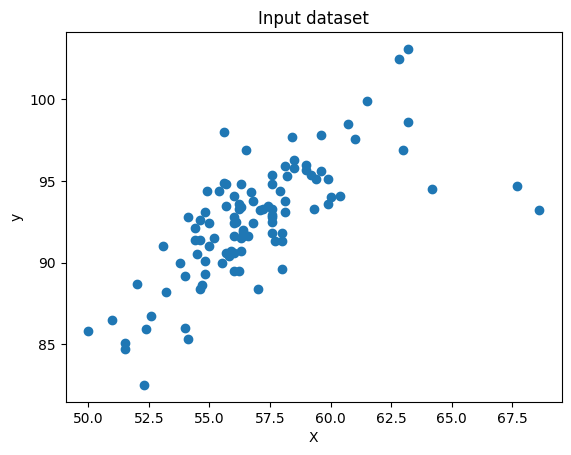

In [57]:
# plot the input data
plt.scatter(X,y)
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

# First regression method using least square
$Ax \approx y$


In [58]:
#A = np.vstack([X[:,0], np.ones(n_rows)]).T
A=np.c_[X,np.ones(len(X))]
print("shape of A:",A.shape)

shape of A: (104, 2)


In [59]:
print(A[0:5,:])

[[60.4  1. ]
 [57.6  1. ]
 [60.   1. ]
 [57.1  1. ]
 [56.3  1. ]]


In [65]:
### YOUR CODE HERE, compute the solution using the pseudo inverse of A
# Manually compute the pseudoinverse of A

# Compute A^T * A
A_T = A.T                                # Transpose of A
A_T_A = A_T @ A                          # A^T * A

# Add regularization term alpha * I


# Compute the inverse of (A^T * A + alpha * I)
A_T_A_inv = np.linalg.inv(A_T_A) # Inverse

# Compute A^T * y
A_T_y = A_T @ y

# Compute the solution X
alfa = A_T_A_inv @ A_T_y

print(alfa)

[ 0.81583211 46.19537303]


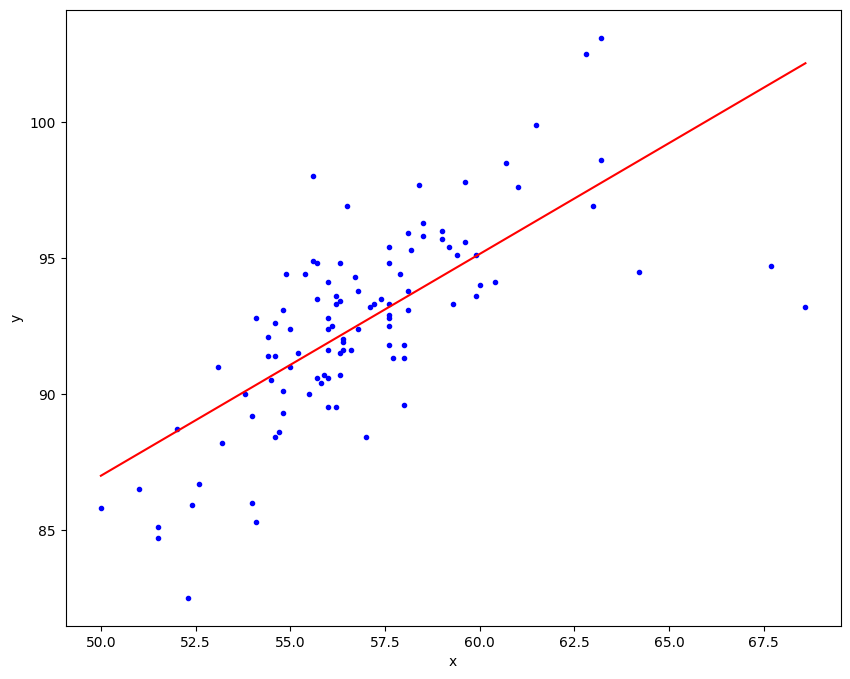

In [66]:
# plot the result
plt.figure(figsize = (10,8))
plt.plot(X, y, 'b.')
z = np.linspace(np.min(X),np.max(X))
plt.plot(z, alfa[0]*z + alfa[1], 'r')
y_pred=A@alfa
#plt.plot(X, y_pred, 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [80]:
# another possibility is the use of the pseudo inverse of numpy
# search numpy documentation of pseudo inverse
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[ 0.81583211 46.19537303]


In [68]:
# last possibility with scipy optimize function
from scipy import optimize
def func(x, a, b):
    y = a*x + b
    return y
alpha = optimize.curve_fit(func, xdata = X, ydata = y)[0]
print(alpha)

[ 0.81583211 46.19537331]


In [69]:
def cost(A,theta,y):
    return np.sqrt(np.mean(np.matmul(A,theta) - y)**2)

In [70]:
#Compute residuals
print("X shape",X.shape)
print("A shape",A.shape)
print("alpha shape",alpha.shape)
print("y shape",y.shape)
res = np.dot(A,alpha) - y
res = A @ alpha - y
print("res shape ",res.shape)
print("Residuals: ",np.linalg.norm(res))
print("Residuals explicit: ",sum((res)**2)/n_rows)
print("Cost",cost(A,alpha,y))

X shape (104,)
A shape (104, 2)
alpha shape (2,)
y shape (104,)
res shape  (104,)
Residuals:  25.50798391648177
Residuals explicit:  6.256319648879739
Cost 2.2885970725365743e-09


Residuals:  492.25683255796463


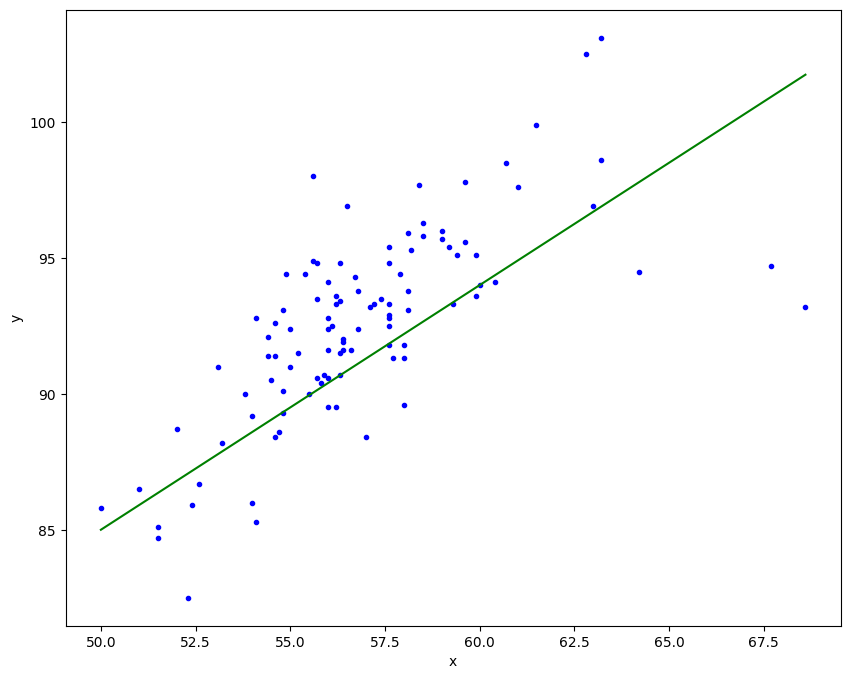

In [71]:
# dummy test with another beta
beta=np.array([[0.9],[40]])
res2 = A @ beta - y
print("Residuals: ",np.linalg.norm(res2))
# plot the result
plt.figure(figsize = (10,8))
plt.plot(X, y, 'b.')
z = np.linspace(np.min(X),np.max(X))
plt.plot(z, beta[0]*z + beta[1], 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Add ridge regularization


In [72]:
lam=1
# add ridge regularization

### YOUR CODE HERE, compute the solution using the pseudo inverse of A
# Manually compute the pseudoinverse of A

# Compute A^T * A
A_T = A.T                                # Transpose of A
A_T_A = A_T @ A                          # A^T * A

# Add regularization term alpha * I
n = A_T_A.shape[0]                       # Size of the square matrix A^T * A
I = np.eye(n)                            # Identity matrix
lamda = 0.1
A_T_A_reg = A_T_A - lamda * I            # A^T * A + alpha * I

# Compute the inverse of (A^T * A + alpha * I)
A_T_A_reg_inv = np.linalg.inv(A_T_A_reg) # Inverse

# Compute A^T * y
A_T_y = A_T @ y

# Compute the solution X
alpha_ridge = A_T_A_reg_inv @ A_T_y

print(alpha_ridge)
res_ridge =A @ alpha_ridge - y
print("Residuals with ridge: ",np.linalg.norm(res_ridge))

[ 1.01438322 34.86753409]
Residuals with ridge:  26.270410804065488


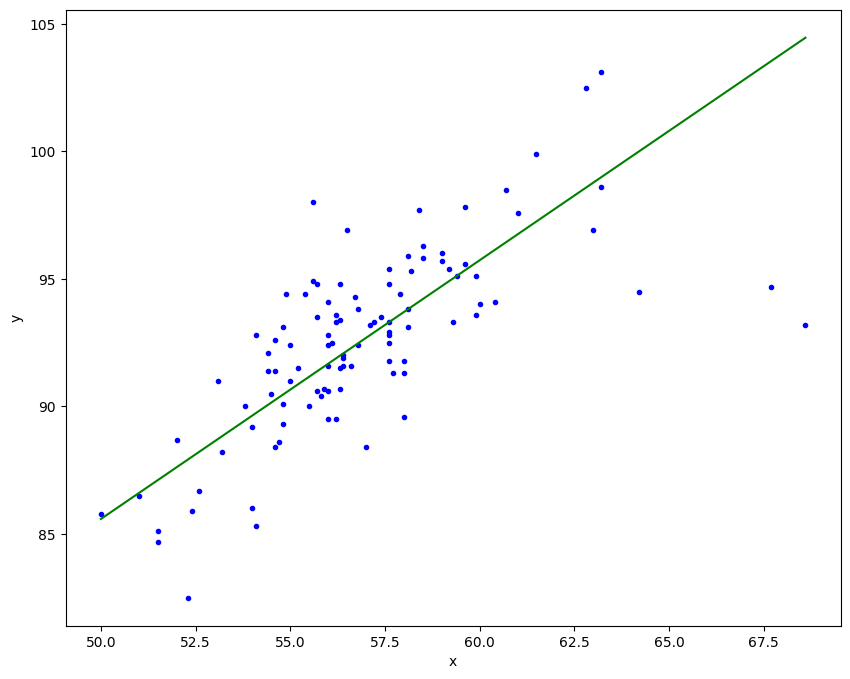

In [73]:
# plot the result
plt.figure(figsize = (10,8))
plt.plot(X, y, 'b.')
z = np.linspace(np.min(X),np.max(X))
plt.plot(z, alpha_ridge[0]*z + alpha_ridge[1], 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Non-linear regression

In [74]:
# check non linear relationships
df.count()

site        104
Pop         104
sex         104
age         104
hdlngth     104
skullw      104
totlngth    104
taill       104
footlgth    104
earconch    104
eye         104
chest       104
belly       104
dtype: int64

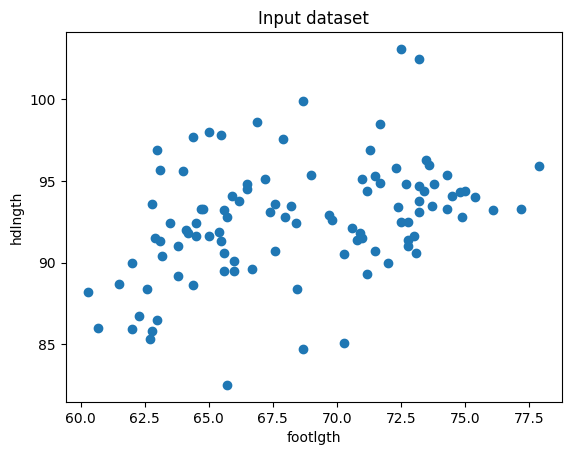

In [82]:
x_label='footlgth'
y_label='hdlngth'
# extract some X data to predict ouput
X=df[x_label].to_numpy().reshape(n_rows)
#extract some Y data
y=df[y_label].to_numpy().reshape(n_rows)
# plot the input data
plt.scatter(X,y)
plt.xlabel(x_label); plt.ylabel(y_label);
plt.title('Input dataset');

In [83]:
# put the data in matrix form
A2=np.c_[X**2,X,np.ones(len(X))]
print("shape of A2:",A2.shape)

shape of A2: (104, 3)


In [84]:
# Use of the pseudo inverse of numpy to get regression coefficients
pinv2 = np.linalg.pinv(A2)
alpha2 = pinv2.dot(y)
print(alpha2)

[-2.96451295e-02  4.38847761e+00 -6.83303933e+01]


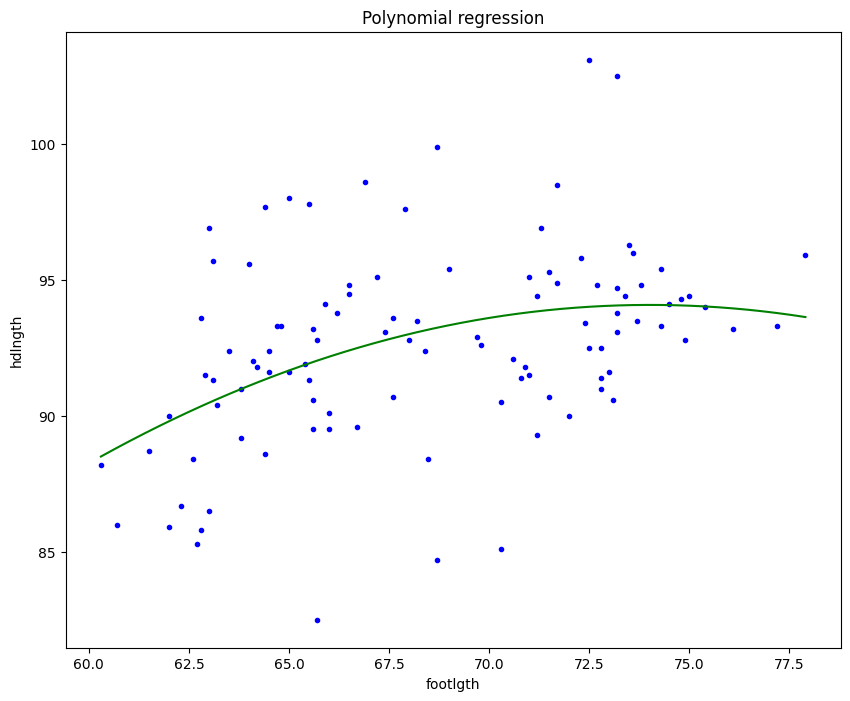

In [85]:
# plot the result
# plot the result
plt.figure(figsize = (10,8))
plt.plot(X, y, 'b.')
z = np.linspace(np.min(X),np.max(X))
plt.plot(z, alpha2[0]*z*z + alpha2[1]*z+alpha2[2], 'g')
plt.xlabel(x_label); plt.ylabel(y_label);
plt.title('Polynomial regression');
plt.show()

## Additional work:

Load in memory the position salary dataset (https://www.kaggle.com/datasets/shimayaghoubian/position-salaries), since the csv file is provided. Inspect the data and try various polynomial regression of salary versus level
